In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
data = pd.read_excel('IPEDS_data.xlsx')

In [184]:
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [185]:
print(list(data.columns))

['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered', 'County name', 'Longitude location of institution', 'Latitude location of institution', 'Religious affiliation', 'Offers Less than one year certificate', 'Offers One but less than two years certificate', "Offers Associate's degree", 'Offers Two but less than 4 years certificate', "Offers Bachelor's degree", 'Offers Postbaccalaureate certificate', "Offers Master's degree", "Offers Post-master's certificate", "Offers Doctor's degree - research/scholarship", "Offers Doctor's degree - professional practice", "Offers Doctor's degree - other", 'Offers Other degree', 'Applicants total', 'Admissions total', 'Enrolled total', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score', 'SAT Writing 75th pe

In [186]:
#What will be a likely enrollment rate?
de = data[['State abbreviation', 'Applicants total', 'Admissions total']]
data_erl = data[['State abbreviation', 'Applicants total', 'Admissions total', 'Name']]

data_erl['Admission rate'] = de['Admissions total']/de['Applicants total']
data_erl2 = data_erl.groupby('State abbreviation')['Admission rate'].mean()

C:\Users\darla\AppData\Local\Temp\ipykernel_20296\4253911618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_erl['Admission rate'] = de['Admissions total']/de['Applicants total']


In [187]:
data_erl2 = pd.DataFrame(data_erl2)
data_erl2 = data_erl2.sort_values('Admission rate', ascending=False)
data_erl2

,Admission rate
State abbreviation,
Wyoming,0.956948
Idaho,0.824823
South Dakota,0.819017
Montana,0.800272
Washington,0.794085
Vermont,0.785711
Arizona,0.768640
Wisconsin,0.750882
Colorado,0.747037


C:\Users\darla\AppData\Local\Temp\ipykernel_20296\206548277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_erl2, x='State abbreviation', y='Admission rate', palette='rocket', errorbar=None)


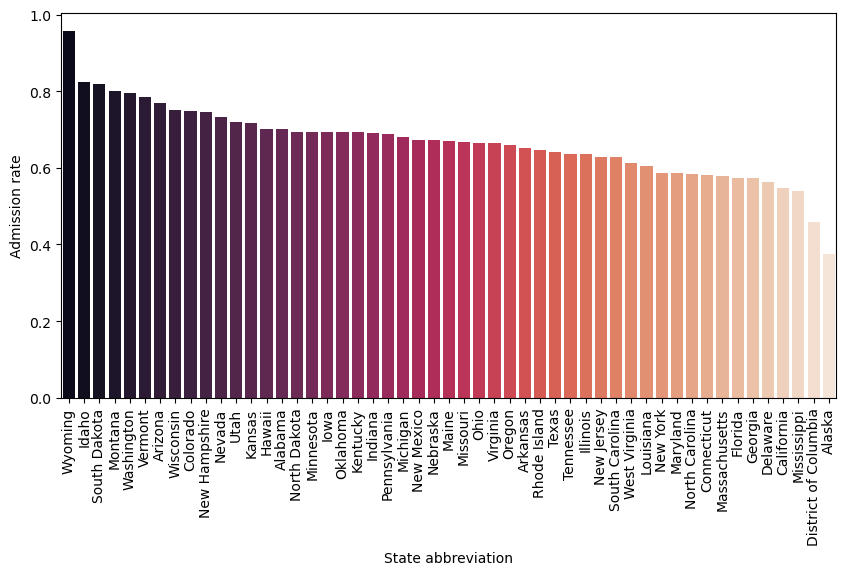

In [188]:
plt.figure(figsize=(10,5))

sns.barplot(data_erl2, x='State abbreviation', y='Admission rate', palette='rocket', errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

In [189]:
#What will be a likely graduation rate?
d = data[["Associate's degrees awarded", "Bachelor's degrees awarded", 
                 "Master's degrees awarded", "Doctor's degrese - research/scholarship awarded", 
                 "Doctor's degrees - professional practice awarded", 
                 "Doctor's degrees - other awarded", 'Certificates of less than 1-year awarded', 
                 'Certificates of 1 but less than 2-years awarded', 
                 'Certificates of 2 but less than 4-years awarded', 'Postbaccalaureate certificates awarded', 
                 "Post-master's certificates awarded"]]

data_grt = data[["Associate's degrees awarded", "Bachelor's degrees awarded", 
                 "Master's degrees awarded", "Doctor's degrese - research/scholarship awarded", 
                 "Doctor's degrees - professional practice awarded", 
                 "Doctor's degrees - other awarded", 'Certificates of less than 1-year awarded', 
                 'Certificates of 1 but less than 2-years awarded', 
                 'Certificates of 2 but less than 4-years awarded', 'Postbaccalaureate certificates awarded', 
                 "Post-master's certificates awarded", "State abbreviation", "Name", 'Admissions total']]

data_grt["Admissions total"].fillna(data_grt.mean)

data_grt['graduation_total'] = d.sum(axis=1)
data_grt['graduation_rate'] = data_grt['graduation_total']/data_grt['Admissions total']

data_grt2 = data_grt.groupby('Name')['graduation_rate'].mean()
data_grt2 = pd.DataFrame(data_grt2)

C:\Users\darla\AppData\Local\Temp\ipykernel_20296\366979894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_grt['graduation_total'] = d.sum(axis=1)
C:\Users\darla\AppData\Local\Temp\ipykernel_20296\366979894.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_grt['graduation_rate'] = data_grt['graduation_total']/data_grt['Admissions total']


In [190]:
data_grt2 = data_grt2.sort_values('graduation_rate', ascending=False)
data_grt2.head()

,graduation_rate
Name,
Golden Gate University-San Francisco,inf
Goddard College,78.500000
Brandman University,63.647059
Marylhurst University,47.000000
National Louis University,24.048193


In [191]:
plt.figure(figsize=(11,5))

sns.barplot(data_grt2, x='State abbreviation', y='graduation_rate', palette='rocket', errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

ValueError: Could not interpret value `State abbreviation` for `x`. An entry with this name does not appear in `data`.

<Figure size 1100x500 with 0 Axes>

In [ ]:
data_erl

,State abbreviation,Applicants total,Admissions total,Name,Admission rate
0,Alabama,6142.0,5521.0,Alabama A & M University,0.898893
1,Alabama,5689.0,4934.0,University of Alabama at Birmingham,0.867288
2,Alabama,NaN,NaN,Amridge University,NaN
3,Alabama,2054.0,1656.0,University of Alabama in Huntsville,0.806232
4,Alabama,10245.0,5251.0,Alabama State University,0.512543
...,...,...,...,...,...
1529,Florida,393.0,136.0,University of South Florida-Sarasota-Manatee,0.346056
1530,New York,3033.0,2158.0,The Kingâ€™s College,0.711507
1531,Kansas,NaN,NaN,Ottawa University-Online,NaN
1532,California,122.0,65.0,Providence Christian College,0.532787


In [ ]:
#Which are the most lucrative colleges for students in terms of pass rate and cost?
dot = pd.merge(data_erl, data_grt)
dot[['Name', 'Admission rate', 'graduation_rate']]

,Name,Admission rate,graduation_rate
0,Alabama A & M University,0.898893,0.151060
1,University of Alabama at Birmingham,0.867288,0.885083
2,Amridge University,NaN,NaN
3,University of Alabama in Huntsville,0.806232,0.972222
4,Alabama State University,0.512543,0.156542
...,...,...,...
1529,University of South Florida-Sarasota-Manatee,0.346056,4.529412
1530,The Kingâ€™s College,0.711507,0.034754
1531,Ottawa University-Online,NaN,NaN
1532,Providence Christian College,0.532787,0.307692


In [ ]:
data_grt2 = data_grt2.sort_values('graduation_rate', ascending=False)
data_grt2

,graduation_rate
State abbreviation,
California,inf
Vermont,5.027125
Oregon,3.003322
Hawaii,1.513902
Florida,1.258022
Illinois,1.112104
Missouri,1.063445
North Dakota,1.004494
Indiana,0.980891
